# **Tarea 4 - CC6205 Natural Language Processing 📚**

**Integrantes:** Cristóbal Alcázar, Gianina Salomó

**Fecha límite de entrega 📆:** Martes 13 de junio.

**Tiempo estimado de dedicación:**

Bienvenid@s a la cuarta tarea del curso de Natural Language Processing (NLP).
En esta tarea estaremos tratando el problema de **tagging** (generación de secuencias de etiquetas del mismo largo que la secuencia de input), el uso de **Convolutional Neural Networks** y **Recurrent Neural Networks**, e implementaremos una red usando PyTorch.

Usen $\LaTeX$ para las fórmulas matemáticas. En la parte de programación pueden usar lo que quieran, pero la [Auxiliar 3](https://youtu.be/36WTXvg3zh0) les puede ser de *gran ayuda*.

**Instrucciones:**
- La tarea se realiza en grupos de **máximo** 2 personas. Puede ser invidivual pero no es recomendable.
- La entrega es a través de u-cursos a más tardar el día estipulado arriba. No se aceptan atrasos.
- El formato de entrega es este mismo Jupyter Notebook.
- Al momento de la revisión tu código será ejecutado. Por favor verifica que tu entrega no tenga errores de compilación.
- En el horario de auxiliar pueden realizar consultas acerca de la tarea a través del canal de Discord del curso.

Si aún no han visto las clases, se recomienda visitar los links de las referencias.

**Referencias:**

- [Tagging, and Hidden Markov Models ](http://www.cs.columbia.edu/~mcollins/cs4705-spring2019/slides/tagging.pdf) (slides by Michael Collins), [notes](http://www.cs.columbia.edu/~mcollins/hmms-spring2013.pdf), [video 1](https://youtu.be/-ngfOZz8yK0), [video 2](https://youtu.be/Tjgb-yQOg54), [video 3](https://youtu.be/aaa5Qoi8Vco), [video 4](https://youtu.be/4pKWIDkF_6Y)
- [MEMMs and CRFs](https://github.com/dccuchile/CC6205/blob/master/slides/NLP-CRF.pdf): [notes 1](http://www.cs.columbia.edu/~mcollins/crf.pdf), [notes 2](http://www.cs.columbia.edu/~mcollins/fb.pdf), [video 1](https://youtu.be/qlI-4lSUDkg), [video 2](https://youtu.be/PLoLKQwkONw), [video 3](https://youtu.be/ZpUwDy6o28Y)
- [Convolutional Neural Networks](https://github.com/dccuchile/CC6205/blob/master/slides/NLP-CNN.pdf): [video](https://youtu.be/lLZW5Fn40r8)
- [Recurrent Neural Networks](https://github.com/dccuchile/CC6205/blob/master/slides/NLP-RNN.pdf): [video 1](https://youtu.be/BmhjUkzz3nk), [video 2](https://youtu.be/z43YFR1iIvk), [video 3](https://youtu.be/7L5JxQdwNJk)

# Hidden Markov Models (HMM), Maximum Entropy Markov Models (MEMM) and Conditional Random Field(CRF) (1,5 puntos)

### Pregunta 1 (1 pt)
Para un problema de POS tagging se define el conjunto de etiquetas $S = \{ \text{DET}, \text{NOUN}, \text{VERB}, \text{ADP} \}$ y se tiene un Hidden Markov Model con los siguientes parámetros estimados a partir de un corpus de entrenamiento:

\begin{equation}
\begin{split}
q(\text{NOUN}| \text{ VERB}, \text{DET}) &= 0.3 \\
q(\text{NOUN}|\ w, \text{DET}) &= 0 \qquad \forall w \in S, w \neq \text{VERB} \\
q(\text{DET}| \text{ VERB}, \text{NOUN}) &= 0.4 \\
q(\text{DET}|\ w, \text{NOUN}) &= 0 \qquad \forall w \in S, w \neq \text{VERB} \\
e(the|\text{ DET}) &= 0.5 \\
e(pasta|\text{ NOUN}) &= 0.6
\end{split}
\end{equation}

Luego para la oración: `the man is pouring sauce on the pasta`, se tiene una tabla de programación dinámica con los siguientes valores:
\begin{equation}
\begin{split}
\pi(7,\text{DET},\text{DET})&=0.1\\
\pi(7,\text{NOUN},\text{DET})&=0.2\\
\pi(7,\text{VERB},\text{DET})&=0.01\\
\pi(7,\text{ADP},\text{DET})&=0.5
\end{split}
\end{equation}

Con esta información, calcule el valor de $\pi(8,\text{DET},\text{NOUN})$. Puede dejar el resultado expresado como una fracción.


**Respuesta**

Se tiene la siguiente función recursiva para cualquier $k \in {1 \dots 8}$, para cualquier $u \in S_{k-1}$ y $v \in S_k$.

$$
\begin{align}
\pi(k, u, v) &= \underset{\substack{w \in S_{k-2}}}{\text{max}} \;(\pi(k-1, w, u) \times q(v|w, u) \times e(x_k|v))
\end{align}
$$

Donde:
* $k$: Posición dentro de la oración
* $u$: Etiqueta de la posición $k-1$
* $v$: Etiqueta de la posición $k$
* $w$: Etiqueta de la posición $k-2$
* $x_k$: Palabra en la posición $k$

Se calcula $\pi(k-1, w, u) \times q(v|w, u) \times e(x_k|v)$ para cada elemento de $S$:

$
\pi(7, \text{DET}, \text{DET}) \times q(\text{NOUN}|\text{DET}, \text{DET}) \times e(\text{pasta}|\text{NOUN}) = 0.1 \times 0 \times 0.6 = 0
$
$
\pi(7, \text{NOUN}, \text{DET}) \times q(\text{NOUN}|\text{NOUN}, \text{DET}) \times e(\text{pasta}|\text{NOUN}) = 0.2 \times 0 \times 0.6 = 0
$
$
\pi(7, \text{VERB}, \text{DET}) \times q(\text{NOUN}|\text{VERB}, \text{DET}) \times e(\text{pasta}|\text{NOUN}) = 0.01 \times 0.3 \times 0.6 = 0.0018
$
$
\pi(7, \text{ADP}, \text{DET}) \times q(\text{NOUN}|\text{ADP}, \text{DET}) \times e(\text{pasta}|\text{NOUN}) = 0.5 \times 0 \times 0.6 = 0
$


Entonces

$$
\begin{align}
\pi(8, \text{DET}, \text{NOUN}) &= \text{max}(0, 0, 0.0018, 0) = 0.0018
\end{align}
$$


### Pregunta 2 (0.5 pts)
Comente  sobre las similitudes o diferencias entre los HMMs, MEMMs y CRFs. Para esto, responda las siguientes preguntas.

#### 2.1. ¿Para qué tipo de tarea sirven? Dé dos ejemplo de este tipo de tarea y descríbalos brevemente. (0.1 pts)

**Respuesta:**

Sirven para el tipo de tarea de _sequence labeling_, donde el output (secuencia de etiquetas) es del mismo largo del input (secuencia de tokens). Dos tareas que se pueden modelar como problemas de sequence labeling son:
* **POS tagging**: Etiquetado de _part of speech_. El output es la secuencia de POS para cada token del input. La idea es entender cuál es el rol sintáctico que tiene una palabra en la oración, lo cual depende del contexto. Algunos POS son NOUN, VERB, PREPOSITION.
* **NER**: _Named Entity Recognition_, que corresponde a la detección de entidades nombradas de cada token del input. Algunas entidades pueden ser "Location" o "Company", dependiendo de qué entidades se desea identificar. Para el resto de entidades, se usa la etiqueta "NA" (ninguna entidad).

#### 2.2. ¿Qué modelos usan features? ¿Qué ventajas conlleva esto? (0.1 pts)

**Respuesta:**

Los modelos que usan features son MEMMs y CRFs. La ventaja de esto es que en los features se puede añadir información que no se puede codificar trivialmente en una HMM, como ver relaciones entre las etiquetas y las palabras. Las features pueden ser combinaciones de covocabulario, palabras, o del espacio de etiquetas, tomando en cuenta por ejemplo prefijos y sufijos.

#### 2.3. ¿Cómo maneja cada uno de los modelos las palabras con baja frecuencia en el set de train? (0.1 pts)

**Respuesta:**

En el caso de HMM, se divide el vocabulario en un conjunto de palabras frecuentes y otro de palabras infrecuentes, siendo las primeras las que ocurren algún número mínimo de veces en el corpus de entrenamiento (ej: 5). Luego se mapea todas las palabras de baja frecuencia, según sus sufijos y prefijos, a un conjunto fijo de categorías (ej: token "90" se puede mapear a la categoría twoDigitNum).

En el caso de MEMMs, se beneficia de la construcción de features que pueden hacer uso de los sufijos y prefijos de las palabras y asocian esto con la etiqueta (ej en inglés: si termina en "ly" es adverbio), o relaciones entre los tokens (ej en inglés: si la palabra anterior es adjetivo, la actual es sustantivo). De esta forma si la palabra es poco frecuente, pero cumple con las reglas de las features, va a contribuir a aumentar el peso asociado las features en entrenamiento.

En el caso de CRF, tiene la ventaha de que resuelve el problema de sesgo de etiqueta; Como MEMM hace una normalización local, se pierde información de cosas que co ocurren poco frecuentemente en todo el corpus. En cambio, CRF soluciona el problema anterior porque hace una optimización global, entonces considera puntajes para las secuencias completas antes de hacer la normalización.

#### 2.4. ¿Qué le permite a los CRF realizar decisiones globales? ¿Qué diferencia con respecto a los MEMMs permite lograr esto? ¿Por qué los HMMs tampoco son capaces de tomar decisiones globales? (0.1 pts)

**Respuesta:**

Lo que permite a los CRF realizar decisiones globales es que se modela la probabilidad de la secuencia de etiquetas candidatas dado la secuencia de palabras del input, $P(s_{1:m}|x_{1:m})$, directamente con un modelo lineal, el cual normaliza por todas las secuencias posibles, siendo entonces una normalización global (la suma corre por todas las secuencias de etiquetas posibles, $|S|^m$, siendo $m$ la cantidad de tokens del input o de etiquetas del output). Tienen un feature vector global para todas las secuencias, que toma en cuenta toda la secuencia de etiquetas (no se restringe a una posición).

Lo que diferencia a los CRF respecto de los MEMMs para lograr lo anterior es que los MEMMs no modelan directamente la probabilidad condicional $P(s_{1:m}|x_{1:m})$, sino que hacen un supuesto de independencia Markoviano que asume que la etiqueta solamente depende de la etiqueta anterior, modelando esto con un modelo log lineal.

Los HMM tampoco son capaces de tomar decisiones globales ya que también aplican un supuesto de independencia Markoviano para la probabilidad conjunta de la secuencia de palabras y la secuencia de etiquetas, donde cada etiqueta solo depende de sus dos etiquetas anteriores, y cada palabra solo depende de su etiqueta correspondiente (por ende todo lo demás, que permitiría realizar una decisión global, lo considera independiente).

#### 2.5 Dado una secuencia de $x_1, ..., x_m$ ¿Cuántas posibles secuencias de etiquetas se pueden generar para un conjunto de etiquetas $S$ con $|S|=k$ ? ¿Analizarlas todas sería computacionalmente tratable? (0.1 pts)

**Respuesta:**

El número de posibles secuencias de etiquetas que se pueden generar para un conjunto de etiquetas $S$ con $|S|=k$ es de $k^m$. Es decir, el número de secuencias posibles crece exponencialmente con el largo de la secuencia. Por tanto, analizar todas las posibles frecuencias _no_ es coputacionalmente tratable; Se tendría que evaluar la secuencia de palabras para todas las secuencias posibles de etiquetas, y para todas calcular la probabilidad. Para la decodificación entonces, lo que se hace en su lugar es utilizar una técnica de programación dinámica, como el algoritmo de Viterbi, que permite encontrar la secuencia más probable de manera eficiente, logrando esto en tiempo polinomial en lugar de tiempo exponencial.

# Convolutional Neural Networks (0,5 puntos)

### Pregunta 3 (0,5 puntos)

Considere la frase $w_{1..7}=$ `El agua moja y el fuego quema` $=[El, agua, moja, y, el, fuego, quema]$.

La siguiente matriz de embeddings, donde la i-ésima fila corresponde al vector de embedding de la i-ésima palabra, ordenadas según aparecen en la frase. (vectores de largo 2).
\begin{equation}
E = \begin{pmatrix}
2 & 2\\
0 & -2\\
0 & 1\\
-2 & 1\\
1 & 0\\
-1 & 1\\
1 & 1
\end{pmatrix}
\end{equation}

Los siguientes 3 filtros
\begin{equation}
U = \begin{pmatrix}
-1 & 1 & 0\\
1 & 1 & 0\\
0 & 0 & -1\\
1 & -1 & -1\\
-1 & -1 & 1\\
1 & 0 & -1
\end{pmatrix}
\end{equation}

Y la función de activación
\begin{equation}
tanh = \frac{e^{2x} - 1}{e^{2x} + 1}
\end{equation}

Usando estos paramátros escriba los pasos para calcular la representación (vector) resultante de aplicar la operación de convolución (sin padding) + max pooling. ¿De qué tamaño sería la ventana que debemos usar?

**Respuesta**

Pasos para calcular la reepresentación resultante de la convolución:

1. Utilizando los índices que representan cada palabra, realizamos una
operación _look-up_ en la tabla de _embeddings_ $E$ para obtener la
representación vectorial continua y compacta de estas. Cada una de las palabras $w_{1:7}$ de la frase `El agua moja y el fuego quema` es representada por un vector $E_{[w_j]}=\bar{w}_{j}\in \mathrm{R}^2$ (i.e. filas en $E$).
2. Luego, concatenamos todos estos vectores que conforman la frase de 7 palabras, y obtenemos el input que ingresará a la red $\bar{x}\in\mathrm{R}^{7\cdot 2=14}$.
<br>

$$
\bar{x}=\oplus~(\bar{w}_1, \dots, \bar{w}_7)
$$
<br>
3. La matriz $U\in\mathrm{R}^{k\times\ell}$ contiene $\ell=3$ diferentes filtros representados por sus columnas, todos de largo $k=6$.
Se convolucionaran estas 3 "versiones" de ventanas móviles de largo $6$ con el
_input_ $\bar{x}$ de largo $n=14$. Debemos considerar el parámetro [_stride_](https://d2l.ai/chapter_convolutional-neural-networks/padding-and-strides.html#stride)
en el movimiento de las ventanas, en este caso particular, la ventana de largo $k=6$ se mueve saltando 2 posiciones, es decir según un _stride_ de $s=2$. Este
parámetro responde al número de dimensiones de los _embeddings_, y es porque
búscamos tratarlos como unidades indivisibles a esta operación. Nos gustaría
realizar operaciones sobre varios vectores de _embeddings_, pero no sobre versiones parciales de estos vectores. **La formula que determina el tamaño del _output_ de la convolución, sin considerar _padding_,
y con un _stride_ de $2$, es $(n-k+s)~/~s=(14-6+2)~/~2=5$**. Es decir, tendremos $3$ "versiones" de secuencias _output_ de largo $5$ (una por cada $\ell$). Esto como resultado de convolucionar cada filtro a lo largo de toda la secuencia _input_.
4. **Sobre el tamaño de la ventana que debemos usar**; nuestra
matriz de pesos $U$, tiene en las columnas los filtros, y en las filas `k= (dim. embedding) x (# tokens en la ventana)` (i.e. $2\times 3$). Es decir, **estamos computando
representaciones con un tamaño de ventana de $3$ tokens, o trigramas, usando convoluciones**. El tamaño del _output_ pensando en tokens, es $n-k+1=7-3+1=5$ (sin _padding_). Este coincide con el tamaño
del punto (3), solo que en esta version pensamos los parámetros de la convolución respecto a lo que estamos representando que son los _tokens_ (i.e.
palabras) que búscamos modelar. En cambio, en el punto anterior (3), estamos pensando los parámetros
directos que recibirá la capa de convolución, en este caso no son los mismos, porque hay una capa de representación entremedio que son los _embeddings_. Esto es importante
cuando se realiza una implementación de esto, dado que las capas de convolución necesitan considerar en su parámetro de tamaño de ventana la dimension de los _embeddings_, y además el _stride_ para computar los n-gramas correctamente.
5. Cuando el filtro esta convolucionando con secciones de la secuencia del
_input_ (i.e. `x[i*s:(i*s+k)]`), se realiza una operación lineal de la sub-secuencia del _input_ con los parámetros del filtro que es un producto punto + el _bias_, seguido
de una no-linealidad como la `tanh`: `tanh(x[s*i:(s*i+k)].dot(U[:,l])+b[l])`. El resultado es un escalar, y se repite esta operación con las 5 sub-secuencias según el movimiento de la ventana, dando
en conjunto el output de la convolución.
<br>

$$
\{y^{(\ell)}\}_{0:5}=\tanh\big(\bar{x}_{2\cdot i:(2\cdot i+6)}\cdot \bar{u}_{\ell} + b_{\ell}\big),~i=0,
\dots, 5.~~\bar{u}_{\ell}=U_{[:, \ell]}
$$
<br>
6. Dado que tenemos 3 filtros, obtendremos 3 versiones del _output_
$\{y^{(\ell)}\}_{0:5}$, cada uno de los filtros
comparte un mismo conjunto de pesos o parámetros. Excluyendo el _bias_ en
cada filtro, tenemos $k=6$ parámetros por cada filtro $\ell=3$, un total de $6\times 3=18$ parámetros encargados de aprender representaciones locales del texto. Considerando el _bias_, tenemos 1 por cada grupo, subiendo a un total
de $18+3=21$ parámetros relacionados a las operaciones de convolución.
7. Finalmente, aplicamos _max pooling_ para agregar la secuencia
de la convolución en el máximo valor, terminaremos con un valor por
cada canal/filtro/kernel, es decir de tamaño 3.

A continuación se implementa en código con los valores de los
parámetros los pasos anteriores para obtener el vector resultado
de largo 3, después de aplicar _max pooling_.

#### Código ilustrando e implementando los pasos anteriores:

Definimos $w, E, U$ según el enunciado de la pregunta.

In [2]:
import torch

# definir activación tanh
tanh = lambda x: (torch.exp(2 * x) - 1) / (torch.exp(2 * x) + 1)

E = torch.tensor([[ 2, 2],
                  [ 0,-2],
                  [ 0, 1],
                  [-2, 1],
                  [ 1, 0],
                  [-1, 1],
                  [ 1, 1]], dtype=torch.float)

U = torch.tensor([[-1, 1, 0],
                  [ 1, 1, 0],
                  [ 0, 0,-1],
                  [ 1,-1,-1],
                  [-1,-1, 1],
                  [1, 0, -1]], dtype=torch.float)

# vector de enteros que representa cada palabra en la
# frase: "El agua moja y el fuego quema"
w = torch.arange(7)

# operación look-up y concatenación implicita de los embedding
# de cada palabra
x = E[w].view(-1)
x

tensor([ 2.,  2.,  0., -2.,  0.,  1., -2.,  1.,  1.,  0., -1.,  1.,  1.,  1.])

Creamos una función para convolucionar filtros en $U$ sobre una
secuencia de _tokens_ representados por sus _embeddings_, el_input_ $x$. Esta convolución no tiene _padding_, pero si tiene el parámetro _stride_ para ajustar la convolución a la dimension de los _embeddings_.

In [3]:
def conv1D(x, U, s=1):
  """Simple convolución sobre input 1D sin padding, aka 'wide convolution'. Se
     utiliza parámetro stride para ajustar la dimensión del output a la
     dimension de los embeddings.
        Input:
          - x: secuencia de embeddings de los tokens
          - U: matriz de filtros (kernels) con largo_kernel x numero_kernel
          - s: stride

        Notación:
          - n: largo secuencia del input x (i.e.  x.shape[0])
          - k: tamaño del filtro (i.e. U.shape[0])
          - ell: identificador de filtro (i.e. U.shape[1])
  """
  k = U.shape[0]
  ell = U.shape[1]
  n = x.shape[0]

  # inicializamos el tensor output, de tamaño ((n-k+s)/s, ell)
  out = torch.zeros(((n - k + s) // s, ell))

  # un bias por cada filtro l, de tamaño (ell, )
  b = torch.zeros(ell)

  # por cada filtro l, convolucionar el filtro con la secuencia input
  for l in range(ell):
    # extraer filtro correspondiente
    u = U[:, l]
    for i in range(out.shape[0]):
      # convolucionar filtro a tráves del input
      out[i, l] = x[(s*i):((s*i)+k)].dot(u) + b[l]
  return out

Cada _output_ asociado al filtro se encuentra en las columnas, en este caso,
replicamos los _inputs_ del ejercicio y obtenemos 3 secuencias de largo 5
una vez que se convoluciona cada uno de los 3 filtros respectivos con el
_input_.

In [4]:
conv1D(x, U, s=2)

tensor([[-1.,  6.,  1.],
        [ 2., -1., -4.],
        [ 1., -1.,  2.],
        [ 5.,  0., -3.],
        [ 0., -1.,  0.]])

Los resultados de la convolución previos aplicar la no-linealidad `tanh` elemento-a-elemento
en cada vector:

$$\bar{y}^{(\ell=1)}=(-1, 2, 1, 5, 0) \in \mathrm{R}^{5}$$
$$\bar{y}^{(\ell=2)}=(6, -1, -1, 0, -1) \in \mathrm{R}^{5}$$
$$\bar{y}^{(\ell=3)}=(1, -4, 2, -3, 0) \in \mathrm{R}^{5}$$

Ahora aplicamos `tanh` y realizamos _max pooling_.

In [5]:
tanh(conv1D(x, U, s=2))

tensor([[-0.7616,  1.0000,  0.7616],
        [ 0.9640, -0.7616, -0.9993],
        [ 0.7616, -0.7616,  0.9640],
        [ 0.9999,  0.0000, -0.9951],
        [ 0.0000, -0.7616,  0.0000]])

Comparemos el paso anterior, se observa como _max pooling_ agrega y
selecciona para cada _feature_ (columna) el máximo valor. Compactando
las versiones de output por cada filtro en un solo número.

In [32]:
torch.nn.functional.max_pool1d(tanh(conv1D(x, U, s=2)).permute(1,0), kernel_size=(3,)).permute(1,0)

tensor([[0.9640, 1.0000, 0.9640]])

# Recurrent Neural Networks (1 punto)


### Pregunta 4 (0,5 puntos)
Usando los embeddings de dos dimensiones de la pregunta anteror, la oración `el fuego quema` la podemos representar por una secuencia de vectores $(\vec{x}_1,\vec{x}_2,\vec{x}_3)$, con $\vec{x}_i \in \mathbb{R}^{d_x}$ y $d_x=2$.

Tenemos una red recurrente *Elman* definidad como:
\begin{equation}
\begin{split}
\vec{s}_i &= R_{SRNN}\left (\vec{x}_i, \vec{s}_{i-1}\right ) = g \left (\vec{s}_{i-1}W^s + \vec{x}_i W^x + \vec{b}\right ) \\
\vec{y}_i &= O_{SRNN}\left(\vec{s}_i\right) = \vec{s}_i \\
\end{split}
\end{equation}
donde
\begin{equation}
\vec{s}_i, \vec{y}_i \in \mathbb{R}^{d_s}, \quad W^x \in \mathbb{R}^{d_x \times d_s}, \quad W^s \in \mathbb{R}^{d_s \times d_s}, \quad \vec{b} \in \mathbb{R}^{d_s},
\end{equation}
y los vectores de estado $s_i$ son de tres dimensiones, $ds= 3$.

Sea
\begin{equation}
\begin{split}
\vec{s}_0 &= [0,0,0]\\
W^x &= \begin{pmatrix}
0 &  0 & 1\\
1 & -1 & 0
\end{pmatrix} \\
W^s &= \begin{pmatrix}
1 & 0 &  1\\
0 & 1 & -1\\
1 & 1 &  1
\end{pmatrix} \\
\vec{b} &= [0, 0, 0] \\
g(x) &= ReLu(x) = max(0, x)
\end{split}
\end{equation}

<br>

Calcule manualmente los valores de los vectores $\vec{s}_1, \vec{s}_2,\vec{s}_3$ y de $\vec{y}_1, \vec{y}_2,\vec{y}_3$.

**Respuesta**

1. Definimos $\vec{x}_1=[1,0]$,  $~\vec{x}_2=[-1, 1]$, y $~\vec{x}_3=[1, 1]$ según
la posición original de las palabras `el fuego quema` en la tabla
de _embeddings_ $E$ anterior.
1. Sabemos que todos los estados $s_{i}$ tienen una dimensionalidad de $d_s=3$.
Dado que el _bias_ es 0, por simplificación omitimos su notación en los
siguientes pasos. Además, para esta red recurrente Elman, $O_{SRNN}(\cdot)$ es
la función identidad, por lo que el output $\vec{y}_i$
es simplemente el estado oculto $\vec{s}_i$. Es decir, los calculos
se concentran en estimar los estados ocultos.
1. Computamos el primer estado oculto:
\begin{split}
\vec{s}_1 &= \max(\boldsymbol 0, ~\vec{s}_0W^{s} + \vec{x}_{1}W^{x}) \\
          &= \max(\boldsymbol 0, ~[0,0,0]\cdot W^{s} + [1,0]\cdot W^{x}) \\
          &= \max(\boldsymbol 0, [0,0,0] + [0, 0, 1]) \\
          &=[0,0,1]
\end{split}
1. Por lo tanto, $\vec{y}_1=[0,0,1]$
1. Actualizamos el estado oculto $\vec{s}_2$ usando el estado anterior $\vec{s}_1$ y el _input_ actual $\vec{x}_2$:
\begin{split}
\vec{s}_2 &= \max(\boldsymbol 0,~\vec{s}_1W^{s}+\vec{x}_2W^x) \\
          &= \max(\boldsymbol 0,~[0,0,1]\cdot W^{s} + [-1,1]\cdot W^{x}) \\
          &= \max(\boldsymbol 0,~[1, 1, 1] + [1, -1, -1]) \\
          &= \max(\boldsymbol 0, ~ [2, 0, 0]) \\
          &= [2, 0, 0]
\end{split}
1. Por lo tanto, $\vec{y}_2=[2,0,0]$.
1. Finalmente,
\begin{split}
\vec{s}_3 &= \max(\boldsymbol 0,~\vec{s}_2W^{s}+\vec{x}_3W^x) \\
          &= \max(\boldsymbol 0,~[2,0,0]\cdot W^{s} + [1,1]\cdot W^{x}) \\
          &= \max(\boldsymbol 0,~[2, 0, 2] + [1, -1, 1]) \\
          &= \max(\boldsymbol 0, ~ [3, -1, 3]) \\
          &= [3, 0, 3]
\end{split}
1. $\vec{y}_3=[3, 0, 3]$.



### Pregunta 5 (0.5 puntos)
¿De qué forma las RNN y las CNN logran aprender representaciones específicas
para la tarea objetivo? Compare la forma en que las RNN y las CNN aprenden con los modelos que usan *features* diseñadas manualmente.

**Respuesta**

Las redes convolucionales (CNN) y redes recurrentes (RNN) son un tipo de arquitectura de redes neuronales (NN), las cuales como toda NN, pueden aprender representaciones y resolver alguna tarea objetivo en conjunto a partir de los datos. A diferencia de modelos más clásicos de NLP, los cuales desacoplan la representación de los datos con la solución de la tarea objetivo, y donde los modelos requieren un diseño previo y manual para construir la representación del texto (i.e. _feature engineering_), y así poder resolver la tarea en cuestion (e.g. clasificación de sentimientos). Las redes neuronales puede aprender representaciones complejas respecto a información sin una estructura obvia ni fácil de representar, y que incluso pueden ser reutilizadas en la solución de diversas tareas comparado con representaciones diseñadas "a la medida" para una tarea en específico.

Respecto al caso particular de trabajar con texto, las arquitecturas de tipo CNN y RNN reciben tensores con secuencias de enteros, los cuales son _tokens_ que representan el texto a cierto nivel (e.g. caracteres, sub-palabras, palabras). Luego, estos enteros se utilizan como identificadores y pasan por una capa de _embeddings_, donde a través de una
operación _look-up_, cada _token_ único (aka vocabulario) se le
asocia un vector continuo de $d$ dimensiones. Estos son
_features_ que representan a los _tokens_ y son aprendidos durante el entrenamiento de las redes.

Las ventajas de las arquitecturas CNN y RNN es que el diseño de sus
redes facilita aprender relaciones más complejas en los datos versus
una arquitectura _fully connected_. En el caso de las CNN
se pueden capturar estructuras locales a partir de sus filtros, de los cuales
se pueden obtener _features_ de más alto nivel. En cambio, las arquitecturas
RNN permiten capturar en un estado la historia de una secuencia de largo arbitrario, y contar como información adicional a la de un _token_
en determinado momento, emergiendo conceptos como contexto y temporalidad
que no existen una red _fully connected_.


# Pregunta 6: Redes Neuronales con Pytorch (3 puntos) 💬

<center>
<img src="https://www.anda.cl/wp-content/uploads/2021/03/0_5vNAtimPjYQr4W72.gif" alt="chatbot" width="400">
</center>

En esta sección de la tarea deberán implementar un Chatbot que sea capaz de generar una conversación *“básica”* utilizando un dataset de *Star Wars*. **El objetivo** de esta pregunta es que puedan aplicar lo aprendido sobre redes neuronales utilizando Pytorch en un ejemplo práctico.  Durante el desarrollo, se espera que puedan diseñar un bot (que tendrá por atrás un clasificador) que sea capaz de clasificar diferentes etiquetas, cosa que una vez identificada la etiqueta entregue una respuesta acorde a lo preguntado.

**Aviso:** Antes de comenzar con una descripción mas profunda de esta sección, les recomendamos que visualicen y se familiaricen con el dataset entregado, de esta forma comprenderán mejor la descripción del enunciado (aquí una pequeña ayudita 🆘).

In [ ]:
import pandas as pd
from torchtext.data.utils import get_tokenizer

example_data = pd.read_json('https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/star_wars_chatbot.json')
print("Cantidad de tags: ", example_data['intents'].shape[0])

Cantidad de tags:  16


A continuación, ejemplos del contenido del primer registro:

In [ ]:
example_data['intents'][0]['patterns']

['Hi',
 'Hey',
 'How are you',
 'Is anyone there?',
 'Hello',
 'Good day',
 "What's up",
 'Yo!',
 'Howdy',
 'Nice to meet you.']

In [ ]:
example_data['intents'][0]['responses']

['Hey',
 'Hello, thanks for visiting.',
 'Hi there, what can I do for you?',
 'Hi there, how can I help?',
 'Hello, there.',
 'Hello Dear',
 'Ooooo Hello, looking for someone or something?',
 'Yes, I am here.',
 'Listening carefully.',
 'Ok, I am with you.']

In [ ]:
example_data['intents'][0]['tag']

'greeting'

In [ ]:
clases = pd.Series([
    t["tag"]
    for t in example_data["intents"]
])
clases.value_counts()

greeting          1
goodbye           1
thanks            1
tasks             1
alive             1
Menu              1
help              1
mission           1
jedi              1
sith              1
bounti hounter    1
funny             1
about me          1
creator           1
myself            1
stories           1
dtype: int64

In [ ]:
tokenizer = get_tokenizer("basic_english")

seq_len = pd.Series([
    len([
      token
      for word in f.split()
      for token in tokenizer(word)
    ])
    for p in example_data["intents"]
    for f in p["patterns"]
])

seq_len.describe(), seq_len.quantile(.9)

(count    97.000000
 mean      5.175258
 std       2.622063
 min       1.000000
 25%       4.000000
 50%       5.000000
 75%       7.000000
 max      13.000000
 dtype: float64,
 9.0)

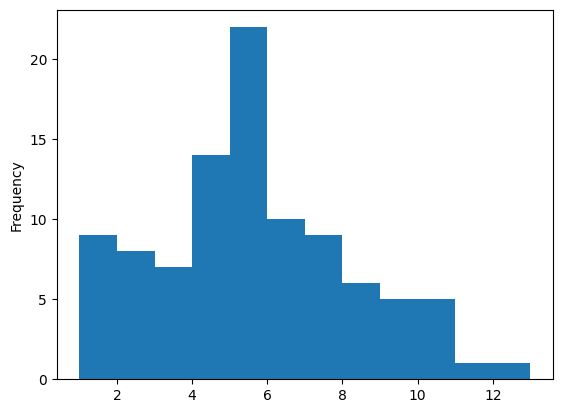

In [ ]:
seq_len.plot(kind="hist", bins=12);

Del dataset cargado podemos notar que este viene en un formato `JSON`, por lo que sus datos están almacenados en diccionarios. Las llaves de los diccionarios no son aleatorias y estos nos sirven para identificar puntos relevantes en el desarrollo del bot. A continuación, se realiza una pequeña descripción de las llaves:

- `patterns`: Almacena los patrones con los que entrenaremos el modelo 😮, en otras palabras, es el corpus de entrenamiento que contiene solo preguntas o expresiones que deberá responder el bot.
- `responses`: Son las respuestas 🙋 relacionadas a los `patterns`, estas las utilizaremos en una etapa posterior a la clasificación, para dar una respuesta aleatoría al usuario.
- `tag`: Son las labels con las que entrenaremos nuestro modelo 💻.

En síntesis, las `keys` relevantes para el entrenamiento de nuestra red neuronal serán `patterns` (corpus) y `tag` (etiquetas).

#### Explicación de la tarea a realizar:

**Explicación de la tarea a realizar**: Implemente una Class llamada `CNNClassifier` que sea capaz de entrenar un modelo de texto a través de una red neuronal Feed Forward y una arquitectura convolucional (CNN 1D) [`torch.nn.Conv1d`](https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html#conv1d) . Para el diseño de las redes tienen completa libertad, pero se le aconseja que se guíen de la última auxiliar para la construcción. Es **importantísimo** que el modelo a crear posea una capa de `Embedding` que se genere en base al entrenamiento del modelo. Creado el modelo, construya una función batch para cargar los datos de entrenamiento del modelo.

Construido el modelo, compare los resultados obtenidos para una red feed forward y una cnn. Para la comprobación de sus resultados ejecute el chatbot y pruebelo, ¿qué configuración tiene mejores resultados?, ¿a qué se deberan estos resultados?

Ojo que un ejemplo de prueba con el chatbot puede ser (agregue mas preguntas ud):

```
Let's chat! (type 'finish_chat' to finish the chat)
You: hi
GA-97: Yes, I am here.
You: can you tell me a joke?
GA-97: Have you tried the gluten-free Wookiee treats? No, but I heard they are a little Chewy.
```

El resto del código referido a la ejecución del chat se los entregamos, por lo que no deberían tener mayores problemas 😸 (en caso de tener problemas con su código, puede modificar cualquier parte sugerida siempre y cuando cumpla lo solicitado).

**Igual [mucho texto](https://i0.wp.com/elgeneracionalpost.com/wp-content/uploads/2020/07/mucho-texto.jpg?fit=1280%2C720&ssl=1).... En resumen, ¿Qué se solicita?:**

- [X] Diseñar una red neuronal Feed Forward.
- [x] Diseñar un red convolucional.
- [X] Utilizar una capa de embeddings para generar representaciones vectoriales del corpus.
- [X] Crear el método forward de la clase `CNNClassifier`.
- [X] Crear la función BATCH.
- [X] Probar el modelo y comparar los resultados obtenidos con la red Feed Forward y la red CNN. Comente sus resultados de forma cualitativa, señalando con qué tipo de red obtuvo mejores resultados con el chatbot.

**Nota-1:** El modelo creado debe tener la opción de entrenar a traves de una feed forward y una CNN. Esto no significa que entrenará una FF y una CN, el modelo deberá recibir un booleano que especifique que tipo de red utilizará.

**Nota-2:** El dataset se descargará automáticamente en la sección `Carga de Dataset 📚`, no os preocupéis.

#### Pasemos al Código 🦾

Esqueleto propuesto (se **RECOMIENDA** que cambien **SOLO** la red neuronal y la función Batch) 🦴:

##### Instalamos librerias necesarias e importamos 😀

In [ ]:
# Esto toma su tiempo en ejecutarse
%%capture
!pip install torch==1.8.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html
!pip install torchtext==0.9.0

In [ ]:
import os
import sys
import json
import torch
import random
from random import choice
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset

from torch.optim import SGD, lr_scheduler
from torch.utils.data import DataLoader
from torch.autograd import Variable

from itertools import zip_longest

import plotly.express as px

import numpy as np
import nltk
from nltk.stem.porter import PorterStemmer

from sklearn.metrics import classification_report, accuracy_score

##### Carga de Dataset 📚

In [ ]:
# we obtain the dataset
!wget 'https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/star_wars_chatbot.json'

--2023-06-10 13:35:39--  https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/star_wars_chatbot.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14469 (14K) [text/plain]
Saving to: ‘star_wars_chatbot.json’

star_wars_chatbot.j 100%[===================>]  14.13K  --.-KB/s    in 0s      

2023-06-10 13:35:39 (36.6 MB/s) - ‘star_wars_chatbot.json’ saved [14469/14469]



In [ ]:
# Load the dataset using json
with open('star_wars_chatbot.json', 'r') as f:
    dataset = json.load(f)

# Create a vocab with the dataset and get the number of classes that have
tokenizer = get_tokenizer("basic_english")
vocab = build_vocab_from_iterator(tokenizer(x) for list_words in dataset['intents'] for x in list_words['patterns'])

# num_classes = len(dataset['intents']) # esto es demasiado ordinario
num_classes = clases.nunique()

# Add <unk> and <pad> -> 0, 1 respectively. Makes <unk> default token for missing
# mapping word->?->'<unk>'
UNK_IDX = 0
vocab.insert_token('<unk>', UNK_IDX)
vocab.set_default_index(UNK_IDX)
vocab.insert_token('<pad>', 1)

# Define a list with the labels
labels = sorted(set([tag for tag in [intents['tag'] for intents in dataset['intents']]]))

# Define a train_list where we can find the info in the format: [(tag_0, text_0)...,(tag_n-1, text_n-1)]
train_list = [(labels.index(intents['tag']), text) for intents in dataset['intents'] for text in intents['patterns']]

In [ ]:
# first 5 word index, 0, ..., 4
vocab.get_itos()[:5]

['<unk>', '<pad>', '.', '?', 'you']

##### Creación del modelo (2 puntos en total)

In [ ]:
# Construya el modelo
class CNNClassifier(nn.Module):
    def __init__(self, vocab_size, sequence_length, embed_dim=32, num_classes=10,
                 use_cnn=False, cnn_pool_channels=24, cnn_kernel_size=3,
                 pad_idx=1, hidden_sizes=[100, 90]):
      super().__init__()
      self.vocab_size = vocab_size
      self.embed_dim = embed_dim
      self.T = sequence_length
      self.num_classes = num_classes

      self.use_cnn = use_cnn

      #padidx -> Se indica el índice del token de padding para que no le afecten los pesos
      self.embedding = nn.Embedding(vocab_size, embed_dim, pad_idx)

      if self.use_cnn:
        # self.K es el tamaño del kernel y la idea es que cubra K tokens de largo la dimension del embedding
        self.K = self.embed_dim * cnn_kernel_size

        # la convolucion mueve una ventana de largo self.K, y va saltando
        # según un stride de self.embed_dim, así salta la representación
        # de 1 token según las dimensiones del embedding
        self.conv_layer = nn.Conv1d(in_channels=1, out_channels=cnn_pool_channels,
                               kernel_size=self.K, stride=self.embed_dim)

        # TODO: utilizar nn.MaxPool1d en vez de torch.max(..)[0]
        #self.pool_layer = nn.MaxPool1d(kernel_size=self.K)
        self.linear = nn.Linear(cnn_pool_channels, self.num_classes)

      else:
        self.hidden_len = len(hidden_sizes)
        self.feed_forward = None
        layers = []

        if self.hidden_len > 0:
          # Caso capas ocultas:
          # primer mapeo de capa de embedding a primera capa oculta
          layers.append(nn.Linear(self.T * self.embed_dim, hidden_sizes[0]))
          layers.append(nn.Tanh())

          # agregar capas intermedias
          for i, s in enumerate(hidden_sizes[1:]):
            layers.append(
                torch.nn.Linear(hidden_sizes[i], s)
            )
            # agregar no-linaridad entre capas excepto en la última. Generalmente
            # no se agrega nada entre la última capa oculta y capa de output
            if i != (self.hidden_len - 2):
              layers.append(nn.Tanh())

          # agregar capa final
          layers.append(nn.Linear(hidden_sizes[-1], self.num_classes))
          self.feed_forward = torch.nn.ModuleList(layers)

        else:
          # Caso sin capas ocultas: se mapea la capa de embedding directo a las clases
          layers.append(nn.Linear(self.T * self.embed_dim, num_classes))
          self.feed_forward = torch.nn.ModuleList(layers)
          #self.feed_forward = nn.Linear(self.T * self.embed_dim, num_classes)

    def init_weights(self):
      # Esto puede ser util para inicializar los pesos
      pass

    def forward(self, x):
      # Dimensiones del input x:          # (B, T)
      out = self.embedding(x)             # (B, T, E)
      out = out.view(out.shape[0], -1)    # (B, T * E)
      if self.use_cnn:
        # --------------------------------# Caso arquitectura CNN, C = # de filtros o kernels, K: tamaño del kernel
        out = out.unsqueeze(1)            # (B, C, T * E)
        out = self.conv_layer(out)        # (B, C, T * E - K + 1)
        out = torch.relu(out)
        out = torch.max(out, dim=2)[0]    # (B, C)
        out = self.linear(out)            # (B, num_classes)
        return out
      else:
        # --------------------------------# Caso arquitectura FeedForward, H[i] = Dimension Hidden i
        for layer in self.feed_forward:   # (B, T * E) -> (B, H[i])        - caso con capas ocultas
          out = layer(out)                # (B, T * E) -> (B, num_classes) - caso sin capas ocultas
        return out                        # (B, num_classes)

##### Función Batch 👷 (0,5 puntos)

In [ ]:
# Defina su función de BATCH
def generate_batch(batch, max_sequence=60, train=True, debug=False):
  """
    Collate Function para pasar a función DataLoader y procesar un batch de
    observaciones con la estructura: (label, ["esto", "es", "un", "text"]).

    Se utiliza tokenizer y vocab (como variables globales) inicializados
    previamente para el corpus de entrenamiento.

    Se retorna una tupla con dos tensores: ((B, T), (B, ))
    Donde B: batch size
          T: tamaño de la secuencia más larga en el batch
  """

  #debug

  if debug:
    for text in batch:
      print("texto", text)

      for word in text[0].split():
        print("palabra", word)

        for token in tokenizer(word):
          print("token", token)


  # creamos una lista con una lista de enteros representando los token de cada texto
  text_i = 1 if train else 0
  x = [[vocab[token] for word in text[text_i].split() for token in tokenizer(word)] for text in batch]

  # Normalizamos usando el máximo entregado vía parámetro (i.e. max_sequence)
  #-----------------------------------------------------------------------------
  x = torch.tensor([
      xs + [vocab['<pad>']] * (max_sequence - len(xs))
      if len(xs) <= max_sequence
      else xs[:max_sequence]
      for xs in x
  ])

  if train:
    # creamos tensor con valores del target para cada observación del batch
    y = torch.tensor([obs[0] for obs in batch])
    return x, y

  return x

##### Sanity Checks 💊

@Cristóbal: esta sección la agregué para realizar pruebas antes de llegar y saltar a entrenar.




En esta sección realizamos pruebas en la construcción de `DataLoader`, inicializción de la red, y que los datos fluyan correctamente
a través del modelo.

Ahora podemos usar nuestra función para procesar los batches y obtener
un tensor `y` para las clases, de tamano `(B,)`, junto a un tensor con las
secuencias tokenizadas y normalizadas de tamaño `(B, T)`. Siendo `B` el
tamaño del _batch_, y `T` el largo de la secuencia máxima en el dataset
de entrenamiento post proceso.

In [ ]:
BATCH_SIZE=8
dl = DataLoader(train_list, batch_size=BATCH_SIZE, collate_fn=generate_batch, shuffle=True)

In [ ]:
print(f"Dimensiones (x, y) de un batch con tamaño {BATCH_SIZE}:\n")
xs, ys = next(iter(dl))
print(f"xs: {xs.shape}")
print(f"ys: {ys.shape}")

Dimensiones (x, y) de un batch con tamaño 8:

xs: torch.Size([8, 60])
ys: torch.Size([8])


In [ ]:
# verificar integer con mapeo stoi de vocab...
#vocab[tokenizer('Tell')[0]]

**Caso FeedForward sin capas ocultas:** mapeo directo de los _embeddings_ a las clases.

In [ ]:
NUM_CLASSES=10
USE_CNN=False
model = CNNClassifier(vocab_size=len(vocab), sequence_length=60, embed_dim=32,
                      num_classes=NUM_CLASSES, use_cnn=USE_CNN, cnn_pool_channels=None,
                      cnn_kernel_size=None, pad_idx=vocab['<pad>'],
                      hidden_sizes=[])

In [ ]:
print(f"Batch size: {xs.shape}")

Batch size: torch.Size([8, 60])


In [ ]:
print(f"Arquitectura del modelo, caso embedding mapeado directo al output:\n\n {model}")

Arquitectura del modelo, caso embedding mapeado directo al output:

 CNNClassifier(
  (embedding): Embedding(132, 32, padding_idx=1)
  (feed_forward): ModuleList(
    (0): Linear(in_features=1920, out_features=10, bias=True)
  )
)


In [ ]:
print(f"Pruebas realizadas con arquitectura diseñada para {NUM_CLASSES} clases de output\n")
print(f"Forward pass y dimensiones del output: {model(xs).shape}")

Pruebas realizadas con arquitectura diseñada para 10 clases de output

Forward pass y dimensiones del output: torch.Size([8, 10])


**Caso FeedForward una sola capa oculta:**

In [ ]:
NUM_CLASSES=20
USE_CNN=False
model = CNNClassifier(vocab_size=len(vocab), sequence_length=60, embed_dim=32,
                      num_classes=NUM_CLASSES, use_cnn=USE_CNN, cnn_pool_channels=None,
                      cnn_kernel_size=None, pad_idx=vocab['<pad>'],
                      hidden_sizes=[200])

In [ ]:
print(f"Batch size: {xs.shape}")

Batch size: torch.Size([8, 60])


In [ ]:
print(f"Arquitectura del modelo, caso una sola capa oculta:\n\n {model}")

Arquitectura del modelo, caso una sola capa oculta:

 CNNClassifier(
  (embedding): Embedding(132, 32, padding_idx=1)
  (feed_forward): ModuleList(
    (0): Linear(in_features=1920, out_features=200, bias=True)
    (1): Tanh()
    (2): Linear(in_features=200, out_features=20, bias=True)
  )
)


In [ ]:
print(f"Pruebas realizadas con arquitectura diseñada para {NUM_CLASSES} clases de output\n")
print(f"Forward pass y dimensiones del output: {model(xs).shape}")

Pruebas realizadas con arquitectura diseñada para 20 clases de output

Forward pass y dimensiones del output: torch.Size([8, 20])


**Caso FeedForward multiples capas ocultas:**

In [ ]:
NUM_CLASSES=4
USE_CNN=False
model = CNNClassifier(vocab_size=len(vocab), sequence_length=60, embed_dim=32,
                      num_classes=NUM_CLASSES, use_cnn=USE_CNN, cnn_pool_channels=None,
                      cnn_kernel_size=None, pad_idx=vocab['<pad>'],
                      hidden_sizes=[20, 25, 50, 25, 20])

In [ ]:
print(f"Batch size: {xs.shape}")

Batch size: torch.Size([8, 60])


In [ ]:
print(f"Arquitectura del modelo, caso capas ocultas:\n\n {model}")

Arquitectura del modelo, caso capas ocultas:

 CNNClassifier(
  (embedding): Embedding(132, 32, padding_idx=1)
  (feed_forward): ModuleList(
    (0): Linear(in_features=1920, out_features=20, bias=True)
    (1): Tanh()
    (2): Linear(in_features=20, out_features=25, bias=True)
    (3): Tanh()
    (4): Linear(in_features=25, out_features=50, bias=True)
    (5): Tanh()
    (6): Linear(in_features=50, out_features=25, bias=True)
    (7): Tanh()
    (8): Linear(in_features=25, out_features=20, bias=True)
    (9): Linear(in_features=20, out_features=4, bias=True)
  )
)


In [ ]:
print(f"Pruebas realizadas con arquitectura diseñada para {NUM_CLASSES} clases de output\n")
print(f"Forward pass y dimensiones del output: {model(xs).shape}")

Pruebas realizadas con arquitectura diseñada para 4 clases de output

Forward pass y dimensiones del output: torch.Size([8, 4])


**Caso CNN:**

In [ ]:
NUM_CLASSES=4
NUM_FEATURES=64
USE_CNN=True
model = CNNClassifier(vocab_size=len(vocab), sequence_length=60, embed_dim=32,
                      num_classes=NUM_CLASSES, use_cnn=USE_CNN,
                      cnn_pool_channels=NUM_FEATURES, cnn_kernel_size=8,
                      pad_idx=vocab['<pad>'], hidden_sizes=None)

In [ ]:
print(f"Batch size: {xs.shape}")

Batch size: torch.Size([8, 60])


In [ ]:
print(f"La operación de convolución entrega {NUM_FEATURES} features para realizar la clasificación por la última capa lineal\n")
print(f"Arquitectura del modelo, caso capas ocultas:\n\n {model}")

La operación de convolución entrega 64 features para realizar la clasificación por la última capa lineal

Arquitectura del modelo, caso capas ocultas:

 CNNClassifier(
  (embedding): Embedding(132, 32, padding_idx=1)
  (conv_layer): Conv1d(1, 64, kernel_size=(256,), stride=(32,))
  (linear): Linear(in_features=64, out_features=4, bias=True)
)


In [ ]:
print(f"Pruebas realizadas con arquitectura diseñada para {NUM_CLASSES} clases de output\n")
print(f"Forward pass y dimensiones del output: {model(xs).shape}")

Pruebas realizadas con arquitectura diseñada para 4 clases de output

Forward pass y dimensiones del output: torch.Size([8, 4])


##### Entrenamiento 🥊

###### Funciones

In [ ]:
def training_loop(model, train_list, epochs=1000, batch_size=16, lr=1e-1,
                  optimizer=SGD, criterion=nn.CrossEntropyLoss,
                  scheduler=lr_scheduler, print_every=100):

  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  print(f"GPU is avaible: {device}")

  model = model.to(device)

  optimizer = optimizer(model.parameters(), lr=lr)
  criterion = criterion().to(device)
  scheduler = scheduler.LambdaLR(optimizer, lr_lambda=[lambda epoch: .9 ** (epoch // 10)])

  print(f'train: {len(train_list)} elements')

  # We train the model using the intents
  loss_list = []
  acc_list = []

  for epoch in range(1, epochs):
    train_loader = DataLoader(train_list, batch_size=BATCH_SIZE, shuffle=True,
                              collate_fn=lambda x: generate_batch(x, SEQ_LEN))

    model.train()
    total_loss = 0
    y_true_list = []
    y_pred_list = []

    for i, (texts, cls) in enumerate(train_loader):
      optimizer.zero_grad()

      texts = texts.to(device)
      cls = cls.to(device)

      output = model(texts)

      probs = torch.softmax(output, dim=1)
      y_hat = probs.argmax(dim=-1)
      y_true_list.extend(cls.cpu().detach().tolist())
      y_pred_list.extend(y_hat.cpu().detach().tolist())

      loss = criterion(output, cls)
      total_loss += loss.item()

      loss.backward()
      optimizer.step()

    acc = accuracy_score(y_true_list, y_pred_list)
    acc_list.append(acc)
    loss_list.append(total_loss)

    if epoch % print_every == 0:
      print(
          f'Epoch: {epoch + 1} \t Epoch loss: {round(total_loss, 3)}'
          f' \t Epoc Acc (train): {round(acc, 5)}'
      )

  print(f'\nfinal loss: {total_loss:.4f}')
  print(f"Best acc: {max(acc_list)} (Época {np.argmax(acc_list)})")
  return model, loss_list, acc_list


def text_single_input(model, q_text, seq_len, **kwargs):
  padded_X = generate_batch(
    [(q_text,)], seq_len, False, **kwargs
  )

  model.eval()
  output = model(padded_X)

  _, predicted = torch.max(output, dim=1)
  return labels[predicted]


def save_model(model, data_dict, file_name):
  # We save de model using pytorch (this is optional, just to learn how to do this in pytorch)
  data_dict["model_state"] = model.state_dict()
  torch.save(data_dict, file_name)

  print(f'training complete. file saved to {file_name}')

def chat_bot(responses, model, seq_len, bot_name="GA-97", **kwargs):
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model.eval()

  print("Let's chat! (type 'finish_chat' to finish the chat)")

  while True:
      q_text = input("You: ")

      if q_text == 'finish_chat':
          break

      padded_X = generate_batch(
          [(q_text,)], seq_len, False, **kwargs
      )

      output = model(padded_X)
      _, predicted = torch.max(output, dim=1)

      tag = labels[predicted.item()]

      probs = torch.softmax(output, dim=1)
      prob = probs[0][predicted.item()]

      if prob.item() > 0.50:
        print(f"{bot_name}: {random.choice(responses[tag])}")

      else:
        print(f"{bot_name}: My model can't understand you...")

###### Experimentos

In [ ]:
# Hiperparámetros generales a los distintos experimentos
BATCH_SIZE = 16
LR = 1e-1
INPUT_SIZE = len(vocab)
OUTPUT_SIZE = num_classes
SEQ_LEN = 10

In [ ]:
mlp_1 = CNNClassifier(INPUT_SIZE, SEQ_LEN, num_classes=OUTPUT_SIZE,
                      use_cnn=False, hidden_sizes=[])

mlp_1, loss_mlp_1, acc_mlp_1 = training_loop(mlp_1, train_list)

GPU is avaible: cpu
train: 97 elements
Epoch: 101 	 Epoch loss: 0.117 	 Epoc Acc (train): 1.0
Epoch: 201 	 Epoch loss: 0.074 	 Epoc Acc (train): 1.0
Epoch: 301 	 Epoch loss: 0.036 	 Epoc Acc (train): 1.0
Epoch: 401 	 Epoch loss: 0.035 	 Epoc Acc (train): 1.0
Epoch: 501 	 Epoch loss: 0.023 	 Epoc Acc (train): 1.0
Epoch: 601 	 Epoch loss: 0.021 	 Epoc Acc (train): 1.0
Epoch: 701 	 Epoch loss: 0.015 	 Epoc Acc (train): 1.0
Epoch: 801 	 Epoch loss: 0.013 	 Epoc Acc (train): 1.0
Epoch: 901 	 Epoch loss: 0.011 	 Epoc Acc (train): 1.0

final loss: 0.0119
Best acc: 1.0 (Época 17)


In [ ]:
mlp_2 = CNNClassifier(INPUT_SIZE, SEQ_LEN, num_classes=OUTPUT_SIZE,
                      use_cnn=False, hidden_sizes=[10])

mlp_2, loss_mlp_2, acc_mlp_2 = training_loop(mlp_2, train_list)

GPU is avaible: cpu
train: 97 elements
Epoch: 101 	 Epoch loss: 0.449 	 Epoc Acc (train): 1.0
Epoch: 201 	 Epoch loss: 0.198 	 Epoc Acc (train): 1.0
Epoch: 301 	 Epoch loss: 0.118 	 Epoc Acc (train): 1.0
Epoch: 401 	 Epoch loss: 0.073 	 Epoc Acc (train): 1.0
Epoch: 501 	 Epoch loss: 0.066 	 Epoc Acc (train): 1.0
Epoch: 601 	 Epoch loss: 0.062 	 Epoc Acc (train): 1.0
Epoch: 701 	 Epoch loss: 0.04 	 Epoc Acc (train): 1.0
Epoch: 801 	 Epoch loss: 0.038 	 Epoc Acc (train): 1.0
Epoch: 901 	 Epoch loss: 0.03 	 Epoc Acc (train): 1.0

final loss: 0.0303
Best acc: 1.0 (Época 48)


In [ ]:
cnn_1 = CNNClassifier(INPUT_SIZE, SEQ_LEN, num_classes=OUTPUT_SIZE,
                      use_cnn=True, hidden_sizes=[])

cnn_1, loss_cnn_2, acc_cnn_2 = training_loop(cnn_1, train_list)

GPU is avaible: cpu
train: 97 elements
Epoch: 101 	 Epoch loss: 0.08 	 Epoc Acc (train): 1.0
Epoch: 201 	 Epoch loss: 0.024 	 Epoc Acc (train): 1.0
Epoch: 301 	 Epoch loss: 0.014 	 Epoc Acc (train): 1.0
Epoch: 401 	 Epoch loss: 0.012 	 Epoc Acc (train): 1.0
Epoch: 501 	 Epoch loss: 0.007 	 Epoc Acc (train): 1.0
Epoch: 601 	 Epoch loss: 0.006 	 Epoc Acc (train): 1.0
Epoch: 701 	 Epoch loss: 0.005 	 Epoc Acc (train): 1.0
Epoch: 801 	 Epoch loss: 0.004 	 Epoc Acc (train): 1.0
Epoch: 901 	 Epoch loss: 0.003 	 Epoc Acc (train): 1.0

final loss: 0.0037
Best acc: 1.0 (Época 22)


##### A probar! 🧪

In [ ]:
q_text = "'Do you know any joke?'" # this must classify the label "funny"

print(text_single_input(mlp_1, q_text, SEQ_LEN))
print(text_single_input(mlp_2, q_text, SEQ_LEN))
print(text_single_input(cnn_1, q_text, SEQ_LEN))

Menu
sith
Menu


Ya pero prometiste hacer un chatbot, no una simple clasificación....

##### Guardamos modelo 🦺 (opcional)

In [ ]:
data_dict = {
  "input_size": INPUT_SIZE,
  "output_size": OUTPUT_SIZE,
  "sequence_length": SEQ_LEN,
  "labels": labels
}

mlp_1_dict = data_dict.copy()
mlp_1_dict["hidden_sizes"] = []
mlp_1_dict["use_cnn"] = False

mlp_2_dict = data_dict.copy()
mlp_2_dict["hidden_sizes"] = [10]
mlp_2_dict["use_cnn"] = False

cnn_1_dict = data_dict.copy()
cnn_1_dict["hidden_sizes"] = []
cnn_1_dict["use_cnn"] = True

save_model(mlp_1, mlp_1_dict, "mlp_1.pth")
save_model(mlp_2, mlp_2_dict, "mlp_2.pth")
save_model(cnn_1, cnn_1_dict, "cnn_1.pth")

training complete. file saved to mlp_1.pth
training complete. file saved to mlp_2.pth
training complete. file saved to cnn_1.pth


##### Chatbot 💬

In [ ]:
responses = {key['tag']: key['responses'] for key in dataset['intents']}

chat_bot(responses, mlp_1, SEQ_LEN)

Let's chat! (type 'finish_chat' to finish the chat)
You: hello there
GA-97: Hi there, how can I help?
You: I have a bad feeling about this
GA-97: My model can't understand you...
You: finish_chat


In [ ]:
chat_bot(responses, mlp_2, SEQ_LEN)

Let's chat! (type 'finish_chat' to finish the chat)
You: hello there
GA-97: Hey
You: I have a bad feeling about this
GA-97: be carreful with your choise: Fuzzy Tauntaun, Bloody Rancor, Jedi Mind Trick, T-16 Skyhopper, Yub Nub, Jet Juice, Hyperdrive, Rancor Beer.
You: finish_chat


In [ ]:
chat_bot(responses, cnn_1, SEQ_LEN)

Let's chat! (type 'finish_chat' to finish the chat)
You: hello there
GA-97: Hello, there.
You: I have a bad feeling about this
GA-97: be carreful with your choise: Fuzzy Tauntaun, Bloody Rancor, Jedi Mind Trick, T-16 Skyhopper, Yub Nub, Jet Juice, Hyperdrive, Rancor Beer.
You: finish_chat


#### Comente los resultados aquí (0,5 puntos)

Dada la baja cantidad de datos proporcionados, no se realizó una división adicional para datos de prueba. Por tanto, solo se realizó medición de accuracy de cada época en los datos de entrenamiento. En los tres experimentos realizados, se observa un aparente sobreajuste, ya que todos alcanzan un accuracy de 1 en los datos de entrenamiento. Nuevamente, esto se deba a la baja cantidad de datos proporcionados, ya que las redes neuronales, al ser modelos complejos, requieren de gran cantidad de datos para alcanzar un buen poder predictivo y a la vez buena capacidad de generalización.

En cuanto a las pruebas de inferencia realizadas, es difícil realizar conclusiones frente a la baja cantidad de casos, pero al menos para una frase en particular se observa que el modelo MLP sin capas ocultas no logra obtener una probabilidad sobre 0.5.

En conclusión, si bien las distintas arquitecturas propuestas parecen indicar que se obtiene un mejor desempeño, ya sea con una red MLP con capas ocultas, o con una CNN de 1 dimensión, se requiere de mayor cantidad de datos de entrenamiento (y una partición de test para evaluar desempeño) para determinar qué arquitectura es mejor para resolver esta tarea.